In [1]:
import sys 
sys.path.append ('/usr/local/lib/python3.9/site-packages')

import pandas as pd
import numpy
import matplotlib.pyplot as plt
#from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('Dummie_data_for_rate_calculator.csv', header=1, sep=';')
df.head()

,Date / Time,Duration,Duration(sec),Wait(sec),Cost EUR,Tariff EUR,User,Type,Status,Campaign ID
0,07.12.2020 18:56:38,00:00:00,0.0,92.0,0.0,0.0,Martino,out,Busy,0.0
1,07.12.2020 18:56:30,00:00:00,0.0,101.0,0.0,0.0,Martino,out,No answer,0.0
2,07.12.2020 18:56:27,00:00:00,0.0,100.0,0.0,0.0,Martino,out,No answer,0.0
3,07.12.2020 18:56:26,00:00:00,0.0,100.0,0.0,0.0,Martino,out,No answer,0.0
4,07.12.2020 18:56:23,00:00:00,0.0,96.0,0.0,0.0,Martino,out,Congestion,0.0


In [3]:
#df.columns

In [4]:
df['Duration(sec)'] = df['Duration(sec)'].fillna(0)

#turn the column into a list
list1 = df["Duration(sec)"].tolist()

#print(list1)

In [5]:
#------Buy Price----

ratebuy = 0.0062    #Buying rate per min
sumsec = sum(list1)
summin = sumsec/60
totalbuy = summin*ratebuy

print("We buy for:", "{:.2f}".format(totalbuy), "EUR")

print('\n')

#------1-1--Revenue----

ratesell = 0.014    #Selling rate per min
total1_1 = summin*ratesell
revenue1_1 = total1_1-totalbuy

print("1-1 Rate minutes:","{:.2f}".format(summin), "min")
print("1-1 Rate revenue:","{:.2f}".format(total1_1), "EUR")
print("And we made ", "{:.2f}".format(revenue1_1), "EUR")

print('\n')

#------3-30-6-----

totalsec = 0

for n in list1:
    if n >= 3 and n < 30:
        totalsec += 30
    if n >= 30:
        the6float = n/6
        the6dec = int(the6float)
        totalsec += (the6dec+1)*6
    
totalmin = totalsec/60
total3_30_6 = totalmin*ratesell
revenue3_30_6 = total3_30_6-totalbuy

#print(datetime.today())
print("3-30-6 Rate minutes:", totalmin, "min")
print("3-30-6 Rate revenue:", "{:.2f}".format(total3_30_6), "EUR")
print("And we made ", "{:.2f}".format(revenue3_30_6), "EUR")

We buy for: 5.85 EUR


1-1 Rate minutes: 943.02 min
1-1 Rate revenue: 13.20 EUR
And we made  7.36 EUR


3-30-6 Rate minutes: 1092.5 min
3-30-6 Rate revenue: 15.29 EUR
And we made  9.45 EUR


In [6]:
dict = {"Billing Type":["1-1", "3-30-6"],
        "Billed Min":[summin, totalmin], 
        "Buy Price":[totalbuy, totalbuy], 
        "Sell Price":[total1_1, total3_30_6],
        "Revenue":[revenue1_1, revenue3_30_6]}

df2 = pd.DataFrame(dict)

df2.head()




,Billing Type,Billed Min,Buy Price,Sell Price,Revenue
0,1-1,943.016667,5.846703,13.202233,7.355530
1,3-30-6,1092.500000,5.846703,15.295000,9.448297


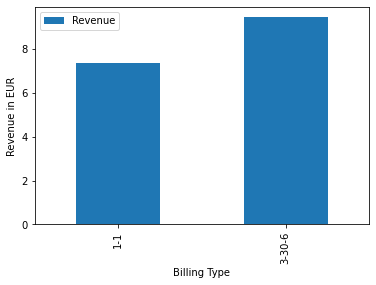

In [7]:
df2.Revenue=pd.to_numeric(df2.Revenue)

df2.plot(x="Billing Type", y="Revenue", kind="bar")
plt.xlabel('Billing Type')
plt.ylabel('Revenue in EUR')
plt.show()

In [8]:
#df2['Billed Min']=pd.to_numeric(df2['Billed Min'])
#df2['Buy Price']=pd.to_numeric(df2['Buy Price'])
#df2['Sell Price']=pd.to_numeric(df2['Sell Price'])